# Exploratory Analysis of Average Temperature
## Exam for _Data Visualization for Scientist_
This project consists in visualizing the temperature increasing in the lasts years due to climate change.
The data came from a [kaggle competition](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data) and consists in the average temperature perceived in different countries/cities.
The visualization part was done using chart.js, and it is accessible at the following link: https://cric96.github.io/climate-change-analysis/
I mainly focused on the global average temperature, to see how the temperature is increasing over the years.

### Idea

The web page should show the average temperature increasing over the years, and the countries that are the most affected by the climate change.
Therefore, a mock for this site was the following:
![Image](https://user-images.githubusercontent.com/23448811/226698615-5c0c61ef-0361-4583-9dd5-87291abf61d8.png)
The site is composed by 3 main parts:
- The first part shows the average temperature increasing over the years in a world map
- The second part shows the top 20 worst delta changes in the average temperature in the selected year
- The third part shows the average temperature increasing over the years in the selected country

The site is interactive, and the user can select the year and the country to see the data for that specific year/country (in the picture, year X and madagascar as country).
There is also a button to start a simulation of the temperature increasing over the years, to see how the temperature is changing over the years.


## Library import & Global Configuration

In [2]:
import pandas as pd ## For data management
import seaborn as sns ## For plotting helpers
import json ## For export data
import numpy as np ## For some data management
from IPython.utils import io ## For hiding output
## Global configuration
sns.set_theme()

## Data Analysis and Extraction
The data came from a [kaggle competition](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-dat) and consists in the average temperature perceived in different countries/cities. You can download the data from the following link: https://figshare.com/ndownloader/files/39540349

In [3]:
with io.capture_output():
    !wget https://figshare.com/ndownloader/files/39540349 -O data.tar.gz;
    !tar -xvf data.tar.gz;
"Data downloaded and extracted!, you can find them in the data folder"

'Data downloaded and extracted!, you can find them in the data folder'

### Data description
The data is composed by 5 different dataset:
- GlobalTemperatures.csv: Global average land and ocean temperatures from 1750 to 2015
- GlobalLandTemperaturesByState.csv: Average land temperatures by state from 1743 to 2013
- GlobalLandTemperaturesByCountry.csv: Average land temperatures by country from 1750 to 2015
- GlobalLandTemperaturesByCity.csv: Average land temperatures by city from 1743 to 2013
- GlobalLandTemperaturesByMajorCity.csv: Average land temperatures by major city from 1850 to 2013

In this project we will focus on the first dataset, which contains the global average temperature.
The columns are:
- dt: The date of when the sensor data was recorded
- LandAverageTemperature: Global average land temperature in celsius
- LandAverageTemperatureUncertainty: The 95% confidence interval around the average
- LandMaxTemperature: Global average maximum land temperature in celsius
- LandMaxTemperatureUncertainty: The 95% confidence interval around the average
- LandMinTemperature: Global average minimum land temperature in celsius
- LandMinTemperatureUncertainty: The 95% confidence interval around the average
- LandAndOceanAverageTemperature: Global average land and ocean temperature in celsius
- LandAndOceanAverageTemperatureUncertainty: The 95% confidence interval around the average

In [4]:
global_temperature = pd.read_csv("data/GlobalTemperatures.csv")
global_temperature_by_state = pd.read_csv("data/GlobalLandTemperaturesByState.csv")
global_temperature_by_country = pd.read_csv("data/GlobalLandTemperaturesByCountry.csv")
global_temperature_by_city = pd.read_csv("data/GlobalLandTemperaturesByCity.csv")
global_temperature_by_major_city = pd.read_csv("data/GlobalLandTemperaturesByMajorCity.csv")
all_dataset = [global_temperature, global_temperature_by_state, global_temperature_by_country, global_temperature_by_city, global_temperature_by_major_city]

### Global temperature format
Here we can see that the dataset contains the average temperature for each country, and the uncertainty of the temperature.

In [5]:
global_temperature.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [6]:
global_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [7]:
global_temperature.sample(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3099,2008-04-01,9.295,0.083,15.420,0.121,3.175,0.127,15.735,0.058
2966,1997-03-01,6.012,0.139,11.808,0.188,0.190,0.095,14.873,0.068
1628,1885-09-01,11.435,0.365,17.317,0.534,5.280,0.451,15.907,0.140
444,1787-01-01,2.845,3.176,NaN,NaN,NaN,NaN,NaN,NaN
1479,1873-04-01,7.462,0.616,13.983,1.262,1.069,1.145,14.879,0.239


### Global temperature for each country format
During the analysis I also checked the dataset for each country.
Since I want to have large grained data, I only considered the average temperature data.

In [8]:
global_temperature_by_country.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [9]:
global_temperature_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [10]:
global_temperature_by_country.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
427680,1797-07-01,21.344,2.506,Romania
277233,1976-10-01,0.034,0.360,Kazakhstan
217252,1945-11-01,27.375,0.362,Guam
222342,1911-05-01,12.282,0.374,Guernsey
253013,2012-05-01,29.740,0.293,Iraq


### Data preprocessing
Even if the data is already clean, I performed some preprocessing to make it more usable for the visualization part.
First of all, I drop the temperature information before 1900, since it is not relevant for the analysis and the uncertainty is too high.
Furthermore, to reduce the overall data, I only considered the average temperature for each year.
From this dataset, I also extracted the top 20 worst delta changes, to see which countries are the most affected by the climate change.


#### Constants

In [11]:
reference_year = 1900
top_worst_delta_changes_count = 20
export_precision = 2

#### Utility functions

In [12]:
def dt_to_datetime(df):
    df["dt"] = pd.to_datetime(df['dt'])

def enrich_with_year(df):
    df["year"] = df.dt.map(lambda date: date.year)

In [13]:
for dataset in all_dataset:
    dt_to_datetime(dataset)
    enrich_with_year(dataset)

#### Data preprocessing

In [14]:
average_temperature_per_year = global_temperature.groupby('year', group_keys=False).mean().reset_index()
reference_average_temperature = average_temperature_per_year[average_temperature_per_year.year == reference_year].LandAverageTemperature.item()
average_temperature_per_year['DeltaTemperature'] = average_temperature_per_year.LandAverageTemperature - reference_average_temperature

### Data analysis
First of all, I want to see the average temperature for each year, to see how the temperature is changing over the years.
The first plot shows the whole trend of the temperature starting from 1850.

<AxesSubplot:xlabel='year'>

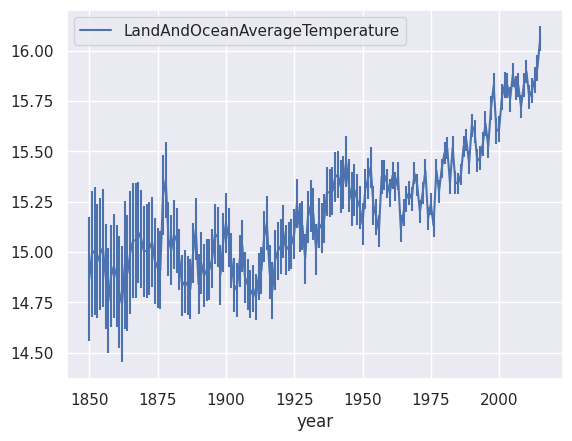

In [15]:
average_temperature_per_year.plot(x="year", y="LandAndOceanAverageTemperature", yerr="LandAndOceanAverageTemperatureUncertainty")

The increasing in the temperature is clearly visible, but in the first 100 years there is a lot of noise.
Therefore, I drop the first 100 years and I plot the data again.

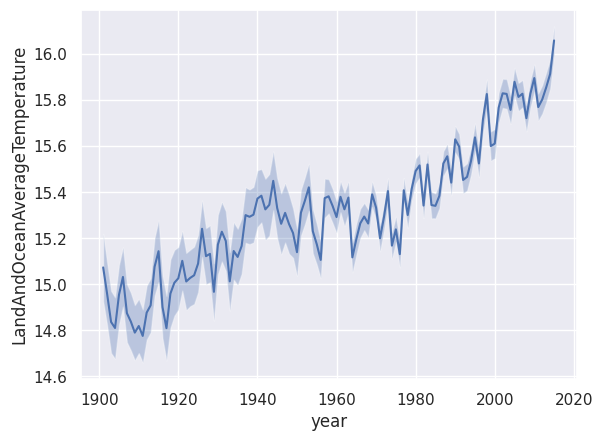

In [16]:
average_temperature_after_reference = average_temperature_per_year[average_temperature_per_year.year > reference_year]
ax = sns.lineplot(data=average_temperature_after_reference, x="year", y="LandAndOceanAverageTemperature")
ax.fill_between(
    average_temperature_after_reference.year,
    average_temperature_after_reference.LandAndOceanAverageTemperature + average_temperature_after_reference.LandAndOceanAverageTemperatureUncertainty,
    average_temperature_after_reference.LandAndOceanAverageTemperature - average_temperature_after_reference.LandAndOceanAverageTemperatureUncertainty,
    alpha=0.3
)

<AxesSubplot:xlabel='year'>

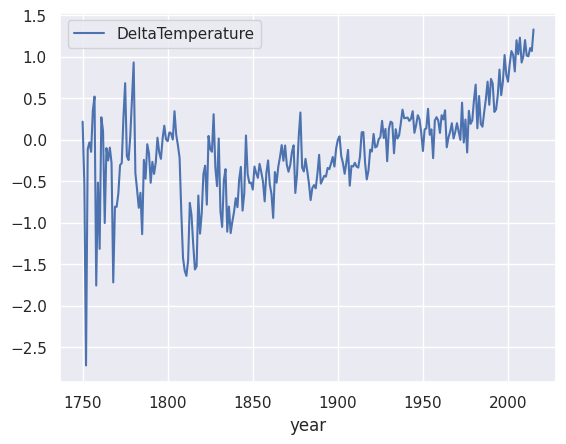

In [17]:
average_temperature_per_year.plot(x="year", y="DeltaTemperature")

The plot shows a clear increasing in the temperature, particularly in the last 50 years.
In the following, I verify the average increasing in Italy and France, to see if the trend is the same for all the countries.

In [18]:
global_temperature_mean_by_country = global_temperature_by_country.groupby(['year', 'Country']).mean().reset_index()

/tmp/ipykernel_34143/811563074.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  average_italy_temperature = global_temperature_mean_by_country[global_temperature_mean_by_country.Country == "Italy"][global_temperature_mean_by_country.year > reference_year]


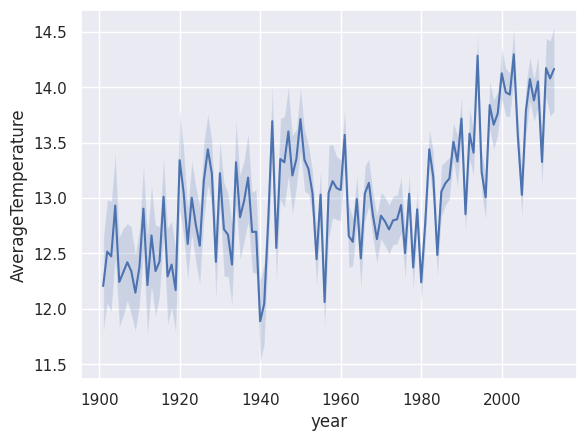

In [19]:
average_italy_temperature = global_temperature_mean_by_country[global_temperature_mean_by_country.Country == "Italy"][global_temperature_mean_by_country.year > reference_year]

ax = sns.lineplot(data=average_italy_temperature, x="year", y="AverageTemperature")
ax.fill_between(
    average_italy_temperature.year,
    average_italy_temperature.AverageTemperature + average_italy_temperature.AverageTemperatureUncertainty,
    average_italy_temperature.AverageTemperature - average_italy_temperature.AverageTemperatureUncertainty,
    alpha=0.2
)

/tmp/ipykernel_34143/4045041080.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  average_france_temperature = global_temperature_mean_by_country[global_temperature_mean_by_country.Country == "France"][global_temperature_mean_by_country.year > reference_year]


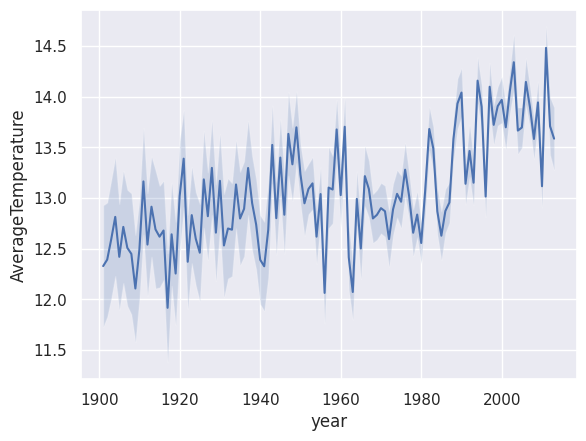

In [20]:
average_france_temperature = global_temperature_mean_by_country[global_temperature_mean_by_country.Country == "France"][global_temperature_mean_by_country.year > reference_year]
ax = sns.lineplot(data=average_france_temperature, x="year", y="AverageTemperature")
ax.fill_between(
    average_france_temperature.year,
    average_france_temperature.AverageTemperature + average_france_temperature.AverageTemperatureUncertainty,
    average_france_temperature.AverageTemperature - average_france_temperature.AverageTemperatureUncertainty,
    alpha=0.2
)

Both Italy and France have a similar trend, with a clear increasing in the temperature.
In the following I verify the delta temperature for Italy with respect to the reference year.

In [21]:
reference_temperature_for_each_country = global_temperature_mean_by_country[global_temperature_mean_by_country.year == reference_year]

In [22]:
for country in global_temperature_mean_by_country["Country"].unique():
    condition = global_temperature_mean_by_country.Country == country
    if reference_temperature_for_each_country[reference_temperature_for_each_country.Country == country].AverageTemperature.count() > 0:
        reference_temperature_for_country = reference_temperature_for_each_country[reference_temperature_for_each_country.Country == country]["AverageTemperature"].item()
        global_temperature_mean_by_country.loc[global_temperature_mean_by_country.Country == country, "DeltaTemperature"] = \
            global_temperature_mean_by_country[global_temperature_mean_by_country.Country == country].AverageTemperature - reference_temperature_for_country

/tmp/ipykernel_34143/3924689447.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  italy_delta_temperature = global_temperature_mean_by_country[global_temperature_mean_by_country.Country == "Italy"][global_temperature_mean_by_country.year > reference_year]


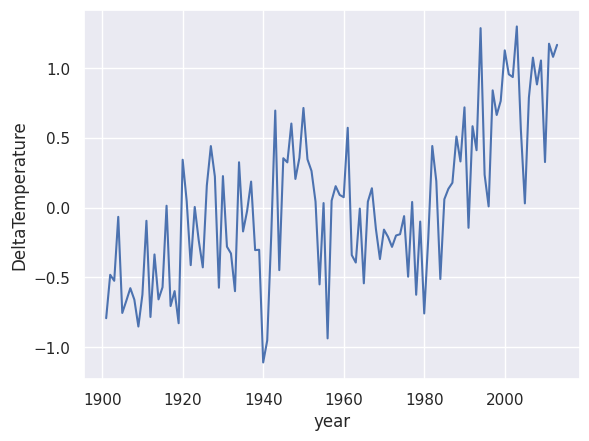

In [23]:
italy_delta_temperature = global_temperature_mean_by_country[global_temperature_mean_by_country.Country == "Italy"][global_temperature_mean_by_country.year > reference_year]
ax = sns.lineplot(data=italy_delta_temperature, x="year", y="DeltaTemperature")

In 2012 there is an average temperature of 1.5 degrees higher than the reference year.
To see the worst countries, I calculate the delta temperature for each country and I store the top 20 worst countries for each year.

In [24]:
def store_rank(row):
    rank = row.sort_values("DeltaTemperature", ascending=False).head(top_worst_delta_changes_count)[["DeltaTemperature", "Country"]]
    rank_list = json.loads(rank.to_json(orient="values"))
    return rank_list
worst_country_increase = global_temperature_mean_by_country[global_temperature_mean_by_country.year >= reference_year]\
    .groupby("year")\
    .apply(store_rank).reset_index()
worst_country_increase.columns = ["year", "rank"]

<AxesSubplot:>

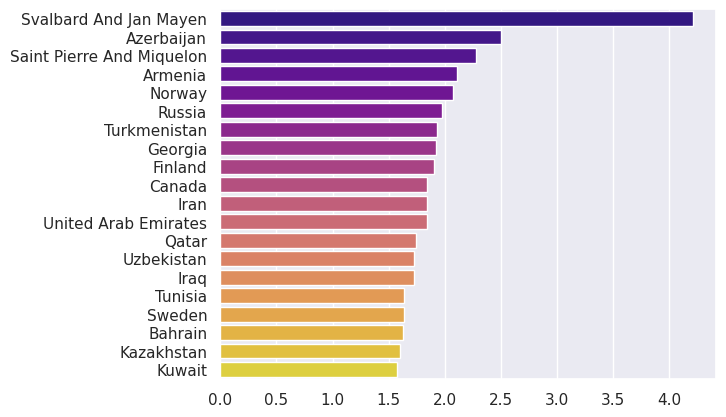

In [25]:
data_to_plot = np.array(worst_country_increase[worst_country_increase.year == 2012]["rank"].item())
sns.barplot(x=data_to_plot[:,0].astype(float), y=data_to_plot[:, 1], palette="plasma")

In 2012 there are countries with an average temperature of 3.5 degrees higher than the reference year.
In the last part, I store the max and min temperature for each country for the whole period.

In [26]:
min_max_for_each_country = global_temperature_mean_by_country[global_temperature_mean_by_country.year > reference_year].groupby("Country").agg({"AverageTemperature": ["min", "max"]}).reset_index()
min_max_for_each_country.columns = ["Country", "min", "max"]
min_max_for_each_country

,Country,min,max
0,Afghanistan,12.547167,16.533625
1,Africa,23.330083,25.472500
2,Albania,11.582500,14.993875
3,Algeria,22.171583,25.215667
4,American Samoa,25.853500,27.537917
...,...,...,...
238,Western Sahara,21.389250,24.114250
239,Yemen,25.549750,28.129750
240,Zambia,20.215000,22.813500
241,Zimbabwe,20.004333,22.840333


### Data extraction / Storage
In the following, I store the data in a json file.
This it will be used in the frontend to show the data.
It is a static page so the data should be as small as possible.
Therefore, we decide to preprocess the data.

The structure of the json file is the following:
```json
{
    "global_temperature": {
        "year": {
            "country": [
                "average_temperature",
                "average_temperature_uncertainty"
            ]
        }
    },
    "global_delta": {
        "year": "delta_temperature"
    },
    "rank": {
        "year": [
            [
                "delta_temperature",
                "country"
            ]
        ]
    },
    "min_max_for_each_country": {
        "country": [
            "min",
            "max"
        ]
    }
}
```
Each key is then stored in a separate file.
Particularly, the `global_temperature_by_country` is used to show the temperature for each country.
I decide to use a geographical map to show the data.
I also precompute the delta temperature for each country with respect to the reference year. This is used to show the overall trend.
The `worst_country_increase` is used to show the worst countries for each year, in particular in the bar chart.


In [27]:
global_temperature_by_country_dict = global_temperature_mean_by_country[global_temperature_mean_by_country.year >= reference_year]\
    .groupby("year")\
    .apply(
        lambda df: df
            .groupby("Country")
            .apply(lambda row: [f'{row["AverageTemperature"].item():.{export_precision}f}', f'{row["AverageTemperatureUncertainty"].item():.{export_precision}f}'])
            .to_dict())\
    .to_dict()

In [28]:
delta_worldwide_per_year_dict = average_temperature_per_year[average_temperature_per_year.year >= reference_year]\
    .groupby("year")\
    .apply(lambda row: f'{row["DeltaTemperature"].item():.{export_precision}f}')\
    .to_dict()

In [29]:
min_max_for_each_country_dict = min_max_for_each_country\
    .groupby("Country")\
    .apply(
        lambda row: {
            "min": f'{row["min"].item():.{export_precision}f}',
            "max": f'{row["max"].item():.{export_precision}f}'
        }
    ).to_dict()

In [30]:
worst_country_increase_dict = worst_country_increase\
    .groupby("year")\
    .apply(
        lambda row: row["rank"].item()
    ).to_dict()

#### Storing part

In [31]:
base_folder = "data-viz/src/assets/"
with open(f'{base_folder}global_temperature.json', 'w', encoding='UTF-8') as file:
    file.write(json.dumps(global_temperature_by_country_dict, ensure_ascii=False))
with open(f'{base_folder}global_delta.json', 'w', encoding='UTF-8') as file:
    file.write(json.dumps(delta_worldwide_per_year_dict, ensure_ascii=False))
with open(f'{base_folder}min_max_for_each_country.json', 'w', encoding='UTF-8') as file:
    file.write(json.dumps(min_max_for_each_country_dict, ensure_ascii=False))
with open(f'{base_folder}rank.json', 'w', encoding='UTF-8') as file:
    file.write(json.dumps(worst_country_increase_dict, ensure_ascii=False))
